# CMSC426, PROJECT01, Shiyuan Duan

In this project we will be implmenting PCA to represent faces into a lower dimention. Then, we will be implementing face recognition.

We start by reading all image data from Train1.

In [202]:
%matplotlib inline 
from matplotlib import pyplot as plt
import matplotlib.image as img
import numpy as np
import os

# number of images
M = 3772

# image dimension
N1 = 150
N2 = 130

# Readin images and store it in A
img_dirs = os.listdir('./Train1')
A = []
for img_dir in img_dirs:
    image = img.imread('./Train1/'+img_dir)
    image = np.reshape(image,(1,150*130))
    
    A.append(image[0])
A = np.asarray(A)
A = np.transpose(A)

print(np.shape(A))

(19500, 3772)


After getting a (150*130 X 3772) matrix, we need to subtract each value in A by mean. As shown below.

In [147]:
mean_face = np.mean(A)
A = A - mean_face
print(A)

[[ 2.11911283 -4.88088717  1.11911283 ...  3.11911283  1.11911283
  -2.88088717]
 [-4.88088717 -1.88088717 -2.88088717 ...  2.11911283 -1.88088717
   1.11911283]
 [ 1.11911283  5.11911283  9.11911283 ...  2.11911283  2.11911283
   2.11911283]
 ...
 [ 1.11911283  0.11911283  1.11911283 ...  1.11911283  0.11911283
   0.11911283]
 [ 1.11911283  0.11911283  1.11911283 ...  1.11911283  0.11911283
   0.11911283]
 [ 1.11911283  0.11911283  1.11911283 ...  1.11911283  0.11911283
   0.11911283]]


### Obtain eigen values and eigen vectors.

Next step is to obtain eigen vectors to get an idea of in which directions the dataset has to max variation. We start from getting the covariance matrix. Since $AA^T$ is too large to manipulate, we will be looking for eigen vectors and eigen values of $A^TA$ instead. Note that $AA^T$ and $A^TA$ share same eigen values and eigen vector of $AA^T$ is just that of $A^TA$ dot with A

In [148]:
AT = np.transpose(A)

cov1 = np.dot(AT,A)

print(np.shape(cov1))

(3772, 3772)


Obtain eigen values as w and eigen vectors as v

In [149]:
w, v = np.linalg.eig(cov1)

Obtain eigen vectors of $AA^T$, u are the eigen vectors representing directions with max variation. 

In [70]:
u = np.dot(A, v)

Now we can take a look at the eigen faces. Note that they are not normalized at this point but this does not matter since we are just visualizing it.

### Eigen face 1

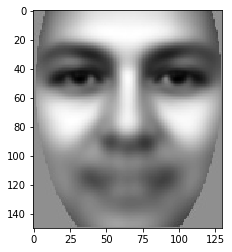

In [150]:
ef1 = np.reshape(u[:,0],(150,130))
plt.imshow(ef1, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

### Eigen face 2

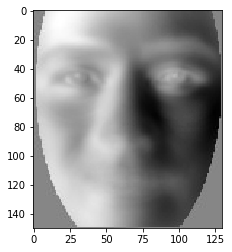

In [151]:
ef2 = np.reshape(u[:,1],(150,130))
plt.imshow(ef2, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

### Eigen face 3

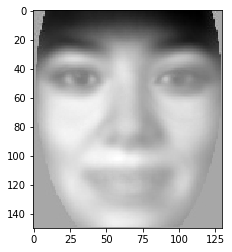

In [152]:
ef3 = np.reshape(u[:,2],(150,130))
plt.imshow(ef3, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

## Projecting image onto first K eigen vectors.

Now we want to explore how PCA works and how much feature it will keep after we reduce the dimension. 

To start with, let's visualize the image we are trying to project onto eigen vectors. We start from the first face.

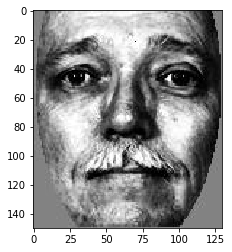

In [153]:
f1 = np.reshape(A[:,0],(150,130))
plt.imshow(f1, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

To start with, let's set the K value to 1. This means that we are reducing the image into a 1 dimentional space and project this dimenstion onto the first eigen vector and other eigen vectors has 0 values. If we are doing everything correctly we should see that the picture does not vary a lot from the eigen faces.

### K =1 

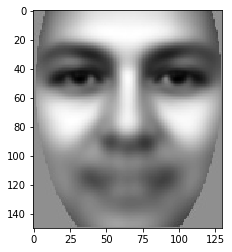

[[ 0.16173198  1.12101842  0.71640793 ...  1.65599163  0.31210784
   0.31210784]
 [-0.02954334 -0.10671877  1.01353736 ... -0.03458186  0.31210784
   0.31210784]
 [ 0.95915851 -0.67177675  0.20040648 ... -0.99682811  0.31210784
   0.31210784]
 ...
 [ 0.31210784  0.31210784  0.31210784 ...  0.31210784  0.31210784
   0.31210784]
 [ 0.31210784  0.31210784  0.31210784 ...  0.31210784  0.31210784
   0.31210784]
 [ 0.31210784  0.31210784  0.31210784 ...  0.31210784  0.31210784
   0.31210784]]


In [162]:
K = 1
testing_face = 0

w_truncated = w[0:K]
u_truncated = u[:,0:K]

weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,testing_face],(150*130,1)))
    weights.append(weight[0][0])
    

    
combined_face = np.zeros([150*130,1],dtype='uint8')

for j in range(0,K):
    eigen_v = np.reshape(u[:,j],(150*130,1))
    eigen_v = eigen_v / np.linalg.norm(eigen_v)
    w_j = weights[j]
    combined_face = combined_face + w_j*eigen_v
    


combined_face = np.reshape(combined_face,(150,130))
plt.imshow(combined_face, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()
    

print(combined_face)

We can see that this face does not vary a lot from the eigen face 1 because we are projecting every point onto the first eigen vector and ignoring other features. 

Now let's increase K and see what happens.

Now we increase K to 10. This means that we will be seeing a face that is a linear combination of the first 10 eigen vectors multiplied by the proper weight. 

### K=10

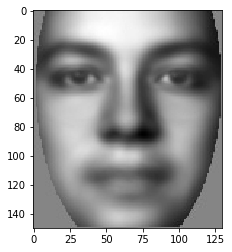

[[-0.20324256  1.23104998  0.60000105 ...  3.18506442  0.19879605
   0.19879605]
 [-0.21246665 -0.27913428  0.97555622 ... -0.33617902  0.19879605
   0.19879605]
 [ 1.01405387 -1.05853059 -0.0786853  ... -2.31590742  0.19879605
   0.19879605]
 ...
 [ 0.19879605  0.19879605  0.19879605 ...  0.19879605  0.19879605
   0.19879605]
 [ 0.19879605  0.19879605  0.19879605 ...  0.19879605  0.19879605
   0.19879605]
 [ 0.19879605  0.19879605  0.19879605 ...  0.19879605  0.19879605
   0.19879605]]


In [163]:
K = 10
testing_face = 0

w_truncated = w[0:K]
u_truncated = u[:,0:K]

weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,testing_face],(150*130,1)))
    weights.append(weight[0][0])
    

    
combined_face = np.zeros([150*130,1],dtype='uint8')

for j in range(0,K):
    eigen_v = np.reshape(u[:,j],(150*130,1))
    eigen_v = eigen_v / np.linalg.norm(eigen_v)
    w_j = weights[j]
    combined_face = combined_face + w_j*eigen_v
    


combined_face = np.reshape(combined_face,(150,130))
plt.imshow(combined_face, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()
    

print(combined_face)



We can see that this face start to look like the original face but it is still far away. This indicates that we are picking a small K value. Now let's increase the K value to 100

### K=100

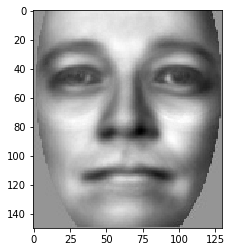

[[ 0.29616115  0.26007716 -0.42810655 ...  2.870996    0.13339853
   0.13339853]
 [ 0.46002697  0.54617375  0.19130881 ... -1.20601469  0.13339853
   0.13339853]
 [ 0.18744252 -0.16402035 -0.72890724 ... -2.57015485  0.13339853
   0.13339853]
 ...
 [ 0.13339853  0.13339853  0.13339853 ...  0.13339853  0.13339853
   0.13339853]
 [ 0.13339853  0.13339853  0.13339853 ...  0.13339853  0.13339853
   0.13339853]
 [ 0.13339853  0.13339853  0.13339853 ...  0.13339853  0.13339853
   0.13339853]]


In [164]:
K = 100
testing_face = 0

w_truncated = w[0:K]
u_truncated = u[:,0:K]

weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,testing_face],(150*130,1)))
    weights.append(weight[0][0])
    

    
combined_face = np.zeros([150*130,1],dtype='uint8')

for j in range(0,K):
    eigen_v = np.reshape(u[:,j],(150*130,1))
    eigen_v = eigen_v / np.linalg.norm(eigen_v)
    w_j = weights[j]
    combined_face = combined_face + w_j*eigen_v
    


combined_face = np.reshape(combined_face,(150,130))
plt.imshow(combined_face, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()
    

print(combined_face)

Now we start to recognize that this is the face we saw before. Now let's add up the first 1000 eigen vectors to see if it looks like the face we are representing. 


### K=1000

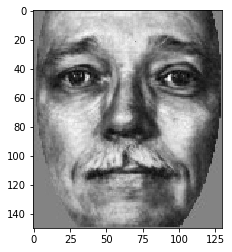

[[ 1.75582992 -1.67025355  0.75814193 ...  1.60532245  1.05607859
   1.05607859]
 [ 3.68754776 -0.96480371 -0.23290242 ... -4.51205948  1.05607859
   1.05607859]
 [ 2.97932172 -1.43513402 -0.79275001 ... -1.38300586  1.05607859
   1.05607859]
 ...
 [ 1.05607859  1.05607859  1.05607859 ...  1.05607859  1.05607859
   1.05607859]
 [ 1.05607859  1.05607859  1.05607859 ...  1.05607859  1.05607859
   1.05607859]
 [ 1.05607859  1.05607859  1.05607859 ...  1.05607859  1.05607859
   1.05607859]]


In [165]:
K = 1000
testing_face = 0

w_truncated = w[0:K]
u_truncated = u[:,0:K]

weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,testing_face],(150*130,1)))
    weights.append(weight[0][0])
    

    
combined_face = np.zeros([150*130,1],dtype='uint8')

for j in range(0,K):
    eigen_v = np.reshape(u[:,j],(150*130,1))
    eigen_v = eigen_v / np.linalg.norm(eigen_v)
    w_j = weights[j]
    combined_face = combined_face + w_j*eigen_v
    


combined_face = np.reshape(combined_face,(150,130))
plt.imshow(combined_face, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()
    

print(combined_face)

We can see that at this point, the combination of the first 1000 eigen vectors (eigen faces) is almost the same as the original image.

## More example

### Second face:

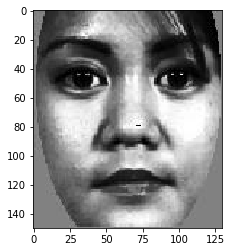

In [166]:
f2 = np.reshape(A[:,1],(150,130))
plt.imshow(f2, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

### second_face, K=1

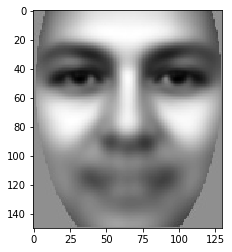

[[ 0.16144363  1.11901978  0.71513066 ...  1.65303919  0.31155139
   0.31155139]
 [-0.02949067 -0.1065285   1.01173034 ... -0.03452021  0.31155139
   0.31155139]
 [ 0.95744844 -0.67057905  0.20004918 ... -0.99505088  0.31155139
   0.31155139]
 ...
 [ 0.31155139  0.31155139  0.31155139 ...  0.31155139  0.31155139
   0.31155139]
 [ 0.31155139  0.31155139  0.31155139 ...  0.31155139  0.31155139
   0.31155139]
 [ 0.31155139  0.31155139  0.31155139 ...  0.31155139  0.31155139
   0.31155139]]


In [167]:
K = 1
testing_face = 1

w_truncated = w[0:K]
u_truncated = u[:,0:K]

weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,testing_face],(150*130,1)))
    weights.append(weight[0][0])
    

    
combined_face = np.zeros([150*130,1],dtype='uint8')

for j in range(0,K):
    eigen_v = np.reshape(u[:,j],(150*130,1))
    eigen_v = eigen_v / np.linalg.norm(eigen_v)
    w_j = weights[j]
    combined_face = combined_face + w_j*eigen_v
    


combined_face = np.reshape(combined_face,(150,130))
plt.imshow(combined_face, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()
    

print(combined_face)

### Second face, k=10

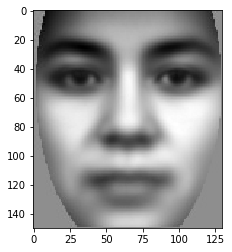

[[-0.04830374  2.74513576  1.94759142 ...  3.42252704  0.48818075
   0.48818075]
 [-0.96378469 -1.31829002  3.51795187 ...  0.35592479  0.48818075
   0.48818075]
 [ 2.94349275 -3.24742805  0.40177414 ... -2.29223041  0.48818075
   0.48818075]
 ...
 [ 0.48818075  0.48818075  0.48818075 ...  0.48818075  0.48818075
   0.48818075]
 [ 0.48818075  0.48818075  0.48818075 ...  0.48818075  0.48818075
   0.48818075]
 [ 0.48818075  0.48818075  0.48818075 ...  0.48818075  0.48818075
   0.48818075]]


In [168]:
K = 10
testing_face = 1

w_truncated = w[0:K]
u_truncated = u[:,0:K]

weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,testing_face],(150*130,1)))
    weights.append(weight[0][0])
    

    
combined_face = np.zeros([150*130,1],dtype='uint8')

for j in range(0,K):
    eigen_v = np.reshape(u[:,j],(150*130,1))
    eigen_v = eigen_v / np.linalg.norm(eigen_v)
    w_j = weights[j]
    combined_face = combined_face + w_j*eigen_v
    


combined_face = np.reshape(combined_face,(150,130))
plt.imshow(combined_face, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()
    

print(combined_face)

### Second face, K=100

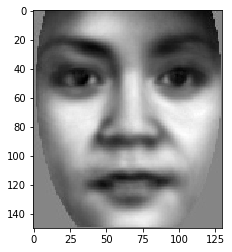

[[-0.45861845  1.55489811  2.39497231 ...  5.64503144  0.46378788
   0.46378788]
 [ 0.05627792 -0.5612731   3.11195568 ...  1.32474468  0.46378788
   0.46378788]
 [ 2.10420374 -2.12909197  0.68384148 ... -3.24311823  0.46378788
   0.46378788]
 ...
 [ 0.46378788  0.46378788  0.46378788 ...  0.46378788  0.46378788
   0.46378788]
 [ 0.46378788  0.46378788  0.46378788 ...  0.46378788  0.46378788
   0.46378788]
 [ 0.46378788  0.46378788  0.46378788 ...  0.46378788  0.46378788
   0.46378788]]


In [171]:
K = 100
testing_face = 1

w_truncated = w[0:K]
u_truncated = u[:,0:K]

weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,testing_face],(150*130,1)))
    weights.append(weight[0][0])
    

    
combined_face = np.zeros([150*130,1],dtype='uint8')

for j in range(0,K):
    eigen_v = np.reshape(u[:,j],(150*130,1))
    eigen_v = eigen_v / np.linalg.norm(eigen_v)
    w_j = weights[j]
    combined_face = combined_face + w_j*eigen_v
    


combined_face = np.reshape(combined_face,(150,130))
plt.imshow(combined_face, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()
    

print(combined_face)

## Face recognition

Now we want to pick a random image from the test image set and project on our eigen vector and compare it to all the images in traning set to find a match

We start from reading in images from test set. 

In [173]:
# number of images


# image dimension
N1 = 150
N2 = 130

# Readin images and store it in A
img_dirs = os.listdir('./Test1')
B = []
for img_dir in img_dirs:
    image = img.imread('./Test1/'+img_dir)
    image = np.reshape(image,(1,150*130))
    
    B.append(image[0])
B = np.asarray(B)
B = np.transpose(B)

print(B)

[[128 131 130 ... 131 130 122]
 [126 124 134 ... 131 131 127]
 [132 134 129 ... 134 125 135]
 ...
 [129 130 129 ... 130 129 128]
 [129 130 129 ... 130 129 128]
 [129 130 129 ... 130 129 128]]


We randomly pick a picture, say 10th picture. 

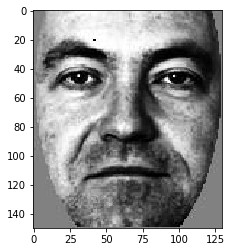

In [177]:
image_testing = 10
rand_p = B[:,image_testing]
rand_p = np.reshape(rand_p,(150,130))
plt.imshow(rand_p, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()


Now we project this image onto our eigen vector to obtain a weight vector

In [184]:
K = 100
test_weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(B[:,10],(150*130,1)))
    test_weights.append(weight[0][0])
    

Now we project each image in training set onto our eigen vectors and find a weight of each one. Then we compare to the test_weights and find the best match

In [194]:
import math
min_val = math.inf
min_indx = -1
for j in range(3772):
    weights = []
    for i in range(K):
        u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
        weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,j],(150*130,1)))
        weights.append(weight[0][0])
        
    diff = np.linalg.norm(np.array(weights) - np.array(test_weights))
    if diff < min_val:
        min_val = diff
        min_indx = j
        
print(min_indx)
    
        
        

2642


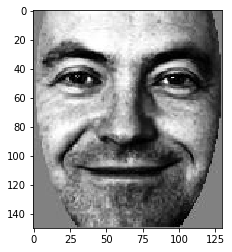

In [198]:
match_img = A[:,min_indx]
match_img = np.reshape(match_img,(150,130))
plt.imshow(match_img, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

We can see that the 2643th image is a perfect match to our testing image. Now let's test another image. The block below shows the image we are testing.

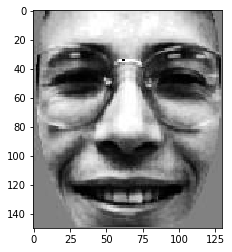

In [199]:
image_testing = 0
rand_p = B[:,image_testing]
rand_p = np.reshape(rand_p,(150,130))
plt.imshow(rand_p, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

Now all we have to do is to repeat this process.

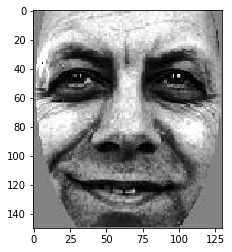

In [201]:
K = 100
test_weights = []
for i in range(0,K):
    u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
    weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(B[:,image_testing],(150*130,1)))
    test_weights.append(weight[0][0])
    
import math
min_val = math.inf
min_indx = -1
for j in range(3772):
    weights = []
    for i in range(K):
        u_i = u_truncated[:,i]/np.linalg.norm(u_truncated[:,i])
        weight = np.dot(np.reshape(u_i,(1,150*130)),np.reshape(A[:,j],(150*130,1)))
        weights.append(weight[0][0])
        
    diff = np.linalg.norm(np.array(weights) - np.array(test_weights))
    if diff < min_val:
        min_val = diff
        min_indx = j
        
match_img = A[:,min_indx]
match_img = np.reshape(match_img,(150,130))
plt.imshow(match_img, interpolation='nearest') #display the image 
plt.gray()  #grayscale conversion
plt.show()

Here we see that after doing PCA, we failed to find a perfect match. This can be caused by various reasons. First, we are only keeping the first 100 eigen vectors. Increasing K may help. Also, there may not be enough traning images in the training set. My laptop takes a long time to run so if you want to increase the K value simply change k=100 to k=1000